50


,x,y,z,in_bounds,radius,one_minus_radius
0,-0.250920,0.901429,0.463988,False,1.044423,-0.044423
0,0.197317,-0.687963,-0.688011,True,0.992767,0.007233
0,-0.883833,0.732352,0.202230,False,1.165503,-0.165503
0,0.416145,-0.958831,0.939820,False,1.405630,-0.405630
0,0.664885,-0.575322,-0.636350,False,1.085361,-0.085361
...,...,...,...,...,...,...
0,-0.928115,-0.068804,0.085289,True,0.934562,0.065438
0,-0.426917,0.181667,-0.939000,False,1.047369,-0.047369
0,-0.925304,0.645201,-0.279619,False,1.162178,-0.162178
0,-0.745879,0.044487,0.539987,True,0.921901,0.078099


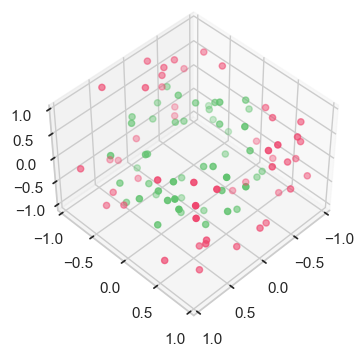

In [56]:
import seaborn as sb
import matplotlib as plt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def plot():
    sb.set(style='whitegrid', rc={"figure.figsize":(4, 4)})    
    sb.set_palette(['#EF476F', '#62C370'])

    fig = plt.figure()
    x1 = fig.add_subplot(111, projection='3d')

    x1.view_init(45, 45)

    for s in df.in_bounds.unique():
        x1.scatter(df.x[df.in_bounds==s],df.y[df.in_bounds==s],df.z[df.in_bounds==s],label=s)

    # plot/seaborn settings
    x1.set(xlim=(-1.02, 1.02))
    x1.set(ylim=(-1.02, 1.02))
    x1.legend([],[], frameon=False)



iterations = 100
np.random.seed(42)

df = pd.DataFrame(columns =["x","y","z","in_bounds","radius","one_minus_radius"])
# Pandas screams at us for not casting the column to a bool type for some reason? This fixes that even though it causes no issues... I miss type safety in rust :(
df["in_bounds"]=df["in_bounds"].astype(bool)

index=0
for e in range(0, iterations):
    x=np.random.uniform(-1,1)
    y=np.random.uniform(-1,1)
    z=np.random.uniform(-1,1)
    
    dist = np.sqrt(x**2 + y**2 + z**2)
    
    row_to_append = pd.DataFrame([{"x":x, "y":y, "z":z, "in_bounds": False if dist > 1 else True, "one_minus_radius": 1-dist, "radius": dist}])
    df = pd.concat([df,row_to_append])
    
    index+=1


mambajamba = df["in_bounds"].value_counts()[False]/iterations
print(df["in_bounds"].value_counts()[False])
# print(mambajamba*8)

display(df)

plot()
    